In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

In [6]:
iris = datasets.load_iris()
X = iris.data[:,2:]  # Fetch 2 features
y = iris.target

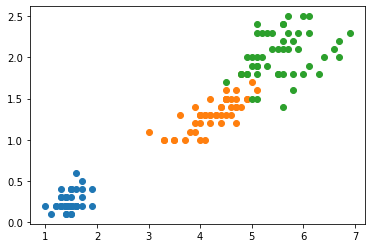

In [7]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

## Decision tree (max_depth=2)

/Users/ada/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


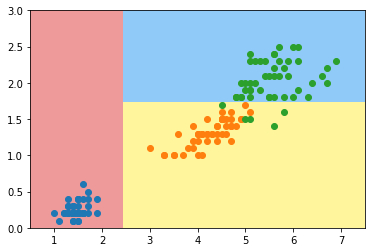

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=60)
dt_clf.fit(X, y)
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

## Entropy
### Entropy increases when the probability is more even among categories. When one of the categories has dominent probability, the entropy decrease. In other words, the more even the model is, the more uncertain it is for a new sample to be classified

In [13]:
# Visualize the relationship between probability and its entropy for classifying 2 categories
def entropy(p):
    return -p * np.log(p) - (1 - p) * np.log(1 - p)

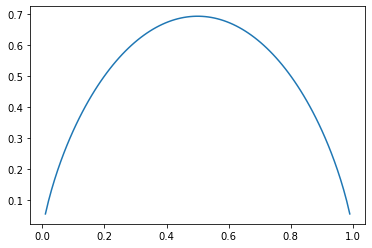

In [14]:
x = np.linspace(0.01, 0.99, 100)
plt.plot(x, entropy(x))
plt.show()

In [20]:
def split(X, y, d, value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

In [23]:
from collections import Counter
from math import log

def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += -p * log(p)
    return res

def try_split(X, y):   
    best_entropy = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1, len(X)):
            if X[sorted_index[i], d] != X[sorted_index[i-1], d]:
                v = (X[sorted_index[i], d] + X[sorted_index[i-1], d])/2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                p_l, p_r = len(X_l) / len(X), len(X_r) / len(X)
                e = p_l * entropy(y_l) + p_r * entropy(y_r)
                if e < best_entropy:
                    best_entropy, best_d, best_v = e, d, v     
    return best_entropy, best_d, best_v

In [27]:
best_entropy, best_d, best_v = try_split(X, y)
print(best_entropy, best_d, best_v)

0.46209812037329684 0 2.45


In [28]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)
entropy(y1_l), entropy(y1_r)

(0.0, 0.6931471805599453)

In [29]:
best_entropy2, best_d2, best_v2 = try_split(X1_r, y1_r)
print(best_entropy2, best_d2, best_v2)

0.2147644654371359 1 1.75


In [30]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)
entropy(y2_l), entropy(y2_r)

(0.30849545083110386, 0.10473243910508653)

### Gini index (criterion="gini" in sklearn by default)

/Users/ada/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


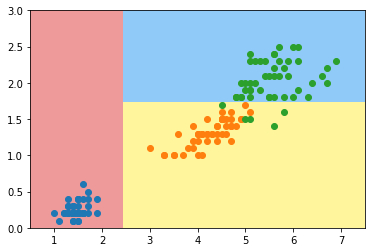

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=2, criterion="gini")
dt_clf.fit(X, y)
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [32]:
def gini(y):
    counter = Counter(y)
    res = 1.0
    for num in counter.values():
        p = num / len(y)
        res -= p*p
    return res

def try_split_gini(X, y):   
    best_gini = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1, len(X)):
            if X[sorted_index[i], d] != X[sorted_index[i-1], d]:
                v = (X[sorted_index[i], d] + X[sorted_index[i-1], d]) / 2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                g = gini(y_l) + gini(y_r)
                if g < best_gini:
                    best_gini, best_d, best_v = e, d, v     
    return best_gini, best_d, best_v

In [34]:
best_gini, best_d, best_v = try_split(X, y)
print(best_gini, best_d, best_v)

0.46209812037329684 0 2.45


In [35]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)
gini(y1_l), gini(y1_r)

(0.0, 0.5)

In [36]:
best_gini2, best_d2, best_v2 = try_split(X1_r, y1_r)
print(best_gini2, best_d2, best_v2)

0.2147644654371359 1 1.75


In [37]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)
gini(y2_l), gini(y2_r)

(0.1680384087791495, 0.04253308128544431)